#                                    Расчетное задание №2     

#                                           Вариант №10


##                                                                                             работу выполнила: 
##                                                                                             Нурдолотова Сабина, группа 20930


### Задание:

В сети параллельно работает K одинаковых концентраторов. Концентратор сети
с коммутацией пакетов обрабатывает пакеты со средней длиной N бит при
скорости передачи в канале V бит/с. Полный входной поток имеет
интенсивность λ1 пакет/с днем и λ2 пакет/с ночью. Концентратор имеет размер
буфера B средних пакетов. Размер очереди равен B-1.
1. Определить вероятность блокировки пакета днем и ночью, если входной и
выходной поток являются пуассоновскими (4 балла).
2. Определить вероятность блокировки пакета в задаче 1, используя метод
Монте-Карло. Сравнить результаты (6 баллов).
3. Определить оптимальный размер буфера, чтобы вероятность блокировки
пакета не превышала 0.0001 (4 балла).

### Условие: 

- K = 2 
- V = 5000 бит/с
- N = 2400 бит
- λ1 = 2 пакет/c
- λ2 = 0.5 пакет/c
- B = 7


### *Пункт №1*


#### Дана многоканальная СМО с ограниченной очередью ####

#### *Используемые формулы:* ####

1) 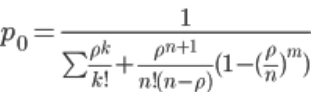

2) 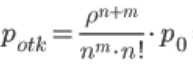

In [4]:
import math 

# интенсивность нагрузки ρ = λ/μ
# интенсивность потока μ = 1/t, где t - время обслуживания
V = 5000
N = 2400
λ1 = 2
λ2 = 0.5
K = 2
B = 7
m = B - 1

t = N/V  # таким образом время обслуживания одного пакета t = 0,48 секунд
μ = 1/t  # μ =~ 2,08(3)

p1 = λ1/μ  # интенсивность нагрузки днем p1 =~ 0.96
p2 = λ2/μ  # интенсивность нагрузки ночью p2 =~ 0.24

def func1(p):  # функция для поиска p0 
    p0 = 0
    for i in range(0, K+1):
        p0 += (p**i)/math.factorial(i)
    a = p**(K + 1)/(math.factorial(K) * (K - p))  
    b = 1 - (p/K)**m
    p0 = p0 + a*b
    
    return p0**(-1)                               
    
p10 = func1(p1) # p0, т. е. вероятность, что канал свободен (день) =~ 0,3519
p20 = func1(p2) # p0, т. е. вероятность, что канал свободен (вечер) =~ 0,7857 

def func2(p, p0): # функция для поиска вероятности отказа
    a = p**(K+m)
    b = (K**m)*math.factorial(K)
    P = a / b
    P = P * p0
    return P

          
print("Вероятность отказа днем:", end=" ")
print(func2(p1, p10))
print("Вероятность отказа ночью:", end=" ")
print(func2(p2, p20)) # почти ноль  
        

Вероятность отказа днем: 0.0019837917159711035
Вероятность отказа ночью: 6.756855285114086e-08


### Заключение ###

Вероятность блокировки пакета днем равна приблизительно 0.0019, тогда можно сделать вывод, что *блокировок пакетов не происходит, и все они обрабатываются*.

Вероятность блокировки пакета ночью стремится к нулю, тогда аналогично *блокировки не происходят, и все пакеты обрабатываются*


### *Пункт №2*

In [19]:
import random
import numpy as np

# Интесивность входного потока днем
lambda_day = 2
# Интесивность входного потока ночью
lambda_night = 0.5
# Максимальный размер очереди
m = 6
# Интенсивность выходного потока
mu = 2.08
# количество концентраторов
k=2
def model(lambda_):
    # Количество пакетов
    n_packets = 1000
    # Текущее время
    t = 0
    # текущий размер очереди первого конценратора
    queue = 0
    # время, когда  прибор освободится
    t_free = [0, 0]
    # Количество потярянных пактеов
    n_lost = 0
    for _ in range(n_packets):
        # время поступления нового пакета
        t += np.random.exponential(scale=1 / lambda_)
        # счетчик для количества концентраторов
        n = 0
        if queue > 0:
            for j in range(k):
                while t_free[j] < t and queue > 0:
                    # обрабатываем пакеты из очереди до момента t
                    t_free[j] += np.random.exponential(scale=1/mu)
                    queue -= 1
        for h in range(k):
            # проверяем, свободен ли концентратор
            if t_free[h] < t:
                # Концентратор свободен, определяем время обслуживания
                t_free[h] = t + np.random.exponential(scale=1/mu)
                break
            else:
                # h - тый онцентратор занят
                n += 1
        # если все концентраторы заняты
        if n == k:
            if queue < m:
                # ставим пакет в очередь
                queue += 1
            else:
                # иначе пакет теряется
                n_lost += 1

    return n_lost / n_packets


# Инициализация генеротора случайных чисел
np.random.seed(100)
# Количество повторов в методе Монте-Карло
n_rep = 500
# Вероятность блокировки днем
p_refuse1 = 0
# Вероятность блокировки вечером
p_refuse2 = 0 
# Имитационное моделирование
for i in range(n_rep):
    p_refuse1 += model(lambda_day)
    p_refuse2 += model(lambda_night)
    # Оценка вероятности блокировки
p_refuse1 /= n_rep
p_refuse2 /= n_rep
print('Вероятность отказа днем:' +str(p_refuse1)) 
print('Вероятность отказа ночью:' +str(p_refuse2)) 

Вероятность отказа днем:0.0019820000000000016
Вероятность отказа ночью:0.0


###  Заключение ###

Вероятности, подсчитанные в первом и втором пункте почти совпадают (до пятого знака после запятой - точно совпадают), следовательно выводы можно сделать аналогичные.

Вероятность блокировки пакета днем равна приблизительно 0.0019, тогда можно сделать вывод, что блокировок пакетов не происходит, и все они обрабатываются.

Вероятность блокировки пакета ночью стремится к нулю, тогда аналогично блокировки не происходят, и все пакеты обрабатываются

### Пункт №3 ###


#### Необходимо найти m из формулы ниже: ####
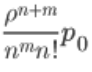

In [31]:
import math 

# интенсивность нагрузки ρ = λ/μ
# интенсивность потока μ = 1/t, где t - время обслуживания
V = 5000
N = 2400
λ1 = 2
λ2 = 0.5
K = 2
B = 7
m = B - 1

t = N/V  # таким образом время обслуживания одного пакета t = 0,48 секунд
μ = 1/t  # μ =~ 2,08(3)

p1 = λ1/μ  # интенсивность нагрузки днем p1 =~ 0.96
p2 = λ2/μ  # интенсивность нагрузки ночью p2 =~ 0.24

def func1(p):  # функция для поиска p0 
    p0 = 0
    for i in range(0, K+1):
        p0 += (p**i)/math.factorial(i)
    a = p**(K + 1)/(math.factorial(K) * (K - p))  
    b = 1 - (p/K)**m
    p0 = p0 + a*b
    
    return p0**(-1)                               
    
p10 = func1(p1) # p0, т. е. вероятность, что канал свободен (день) 
p20 = func1(p2) # p0, т. е. вероятность, что канал свободен (вечер) 

def func2(p, p0): # функция для поиска вероятности отказа
    a = p**(K+m)
    b = (K**m)*math.factorial(K)
    P = a / b
    P = P * p0
    return P

    
print("Оптимальный размер буфера, чтобы вероятность блокировки пакета не превышала 0.0001:")
p = 1
while p > 0.0001: # просто перебором ищем оптимальное B для дня
    B += 1
    m = B - 1
    p10 = func1(p1) 
    p = func2(p1,p10)
print("1) Днем: ", B) 
print("при B = 12 , вероятность p = ", format(p, '.6f'))    # вероятность отказа равна 0.00010512563058596704 при B = 11
                                                            # вероятность отказа равна 0.000050457756567595 при B = 12 => ответ 12
 

B = 1
m = B - 1
p = 1
while p > 0.0001: # просто перебором ищем оптимальное B для ночи
    B += 1
    m = B - 1
    p10 = func1(p1) 
    p = func2(p2,p20)
print()    
print("2) Вечером: ", B)                                  # вероятность отказа равна 0.000326 при B = 3
print("при B = 4 , вероятность p = ", format(p, '.6f'))# вероятность отказа равна 0.000039102171788854 при B = 4 => ответ 4
    


Оптимальный размер буфера, чтобы вероятность блокировки пакета не превышала 0.0001:
1) Днем:  12
при B = 12 , вероятность p =  0.000050

2) Вечером:  4
при B = 4 , вероятность p =  0.000039


### Заключение ###

Для того, чтобы получить вероятность блокировки не больше, чем 0.0001
нужно предусмотреть буфер длиной *не менее 12 пакетов днем и 4 ночью*
